In [1]:
#!pip install scikit-learn
#!pip install pandas matplotlib seaborn

<div dir="rtl" style="text-align: justify; line-height: 1.6;">

قبل از هرگونه تمیزکاری یا مدل‌سازی، لازم است کتابخانه‌های مورد نیاز را فراخوانی کرده و داده‌ها را در محیط پایتون بارگذاری کنیم تا ساختار آن‌ها را ببینیم.

<h3>قدم ۱: تنظیم محیط و بارگذاری داده‌ها (Environment Setup & Data Loading)</h3>

در این مرحله:
<ul>
    <li>کتابخانه‌های ضروری (<code>Pandas</code>, <code>NumPy</code>, etc) را وارد می‌کنیم.</li>
    <li>فایل‌های <code>train.csv</code> و <code>test.csv</code> را می‌خوانیم.</li>
    <li>فایل‌های برچسب (Labels) را برای استفاده‌های بعدی می‌خوانیم.</li>
    <li>یک بررسی اولیه (<code>EDA</code>) برای دیدن ابعاد داده‌ها و مقادیر گمشده انجام می‌دهیم.</li>
</ul>

</div>

Loading datasets...
Training set shape: (14993, 24)
Test set shape: (3972, 23)
Data loaded successfully.

--- First 5 rows of Training Data ---


,Type,Name,Age,Breed1,Breed2,Gender,Color1,Color2,Color3,MaturitySize,...,Health,Quantity,Fee,State,RescuerID,VideoAmt,Description,PetID,PhotoAmt,AdoptionSpeed
0,2,Nibble,3,299,0,1,1,7,0,1,...,1,1,100,41326,8480853f516546f6cf33aa88cd76c379,0,Nibble is a 3+ month old ball of cuteness. He ...,86e1089a3,1.0,2
1,2,No Name Yet,1,265,0,1,1,2,0,2,...,1,1,0,41401,3082c7125d8fb66f7dd4bff4192c8b14,0,I just found it alone yesterday near my apartm...,6296e909a,2.0,0
2,1,Brisco,1,307,0,1,2,7,0,2,...,1,1,0,41326,fa90fa5b1ee11c86938398b60abc32cb,0,Their pregnant mother was dumped by her irresp...,3422e4906,7.0,3
3,1,Miko,4,307,0,2,1,2,0,2,...,1,1,150,41401,9238e4f44c71a75282e62f7136c6b240,0,"Good guard dog, very alert, active, obedience ...",5842f1ff5,8.0,2
4,1,Hunter,1,307,0,1,1,0,0,2,...,1,1,0,41326,95481e953f8aed9ec3d16fc4509537e8,0,This handsome yet cute boy is up for adoption....,850a43f90,3.0,2



--- Training Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14993 entries, 0 to 14992
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Type           14993 non-null  int64  
 1   Name           13728 non-null  object 
 2   Age            14993 non-null  int64  
 3   Breed1         14993 non-null  int64  
 4   Breed2         14993 non-null  int64  
 5   Gender         14993 non-null  int64  
 6   Color1         14993 non-null  int64  
 7   Color2         14993 non-null  int64  
 8   Color3         14993 non-null  int64  
 9   MaturitySize   14993 non-null  int64  
 10  FurLength      14993 non-null  int64  
 11  Vaccinated     14993 non-null  int64  
 12  Dewormed       14993 non-null  int64  
 13  Sterilized     14993 non-null  int64  
 14  Health         14993 non-null  int64  
 15  Quantity       14993 non-null  int64  
 16  Fee            14993 non-null  int64  
 17  State          14993 n

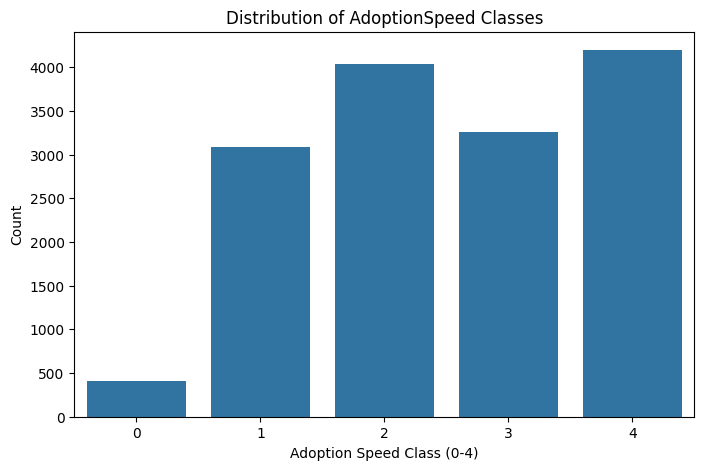

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# ---------------------------------------------------------
# 1. Configuration and Path Setup
# ---------------------------------------------------------
# Define the base directory for the dataset based on the project structure
BASE_DIR = 'E:\Boot camp\ML\Project-ML\Input'
TRAIN_DIR = os.path.join(BASE_DIR, 'train')
TEST_DIR = os.path.join(BASE_DIR, 'test')

# ---------------------------------------------------------
# 2. Load Tabular Data
# ---------------------------------------------------------
print("Loading datasets...")

# Load training and testing data
# train.csv contains features and the target variable 'AdoptionSpeed'
train_df = pd.read_csv(os.path.join(TRAIN_DIR, 'train.csv'))
test_df = pd.read_csv(os.path.join(TEST_DIR, 'test.csv'))

# Load label lookup tables (Breed, Color, State)
# These files map IDs to human-readable names
breed_labels = pd.read_csv(os.path.join(BASE_DIR, 'breed_labels.csv'))
color_labels = pd.read_csv(os.path.join(BASE_DIR, 'color_labels.csv'))
state_labels = pd.read_csv(os.path.join(BASE_DIR, 'state_labels.csv'))

print(f"Training set shape: {train_df.shape}")
print(f"Test set shape: {test_df.shape}")
print("Data loaded successfully.\n")

# ---------------------------------------------------------
# 3. Initial Data Inspection (Exploratory Data Analysis)
# ---------------------------------------------------------
# Display the first few rows of the training data to understand the structure
print("--- First 5 rows of Training Data ---")
display(train_df.head())

# Check for data types and missing values
# This helps identify columns that require imputation or type conversion
print("\n--- Training Data Info ---")
print(train_df.info())

# Check for missing values in the training set
print("\n--- Missing Values in Training Data ---")
missing_values = train_df.isnull().sum()
print(missing_values[missing_values > 0])

# ---------------------------------------------------------
# 4. Target Variable Distribution
# ---------------------------------------------------------
# Visualizing the distribution of 'AdoptionSpeed' (Target Variable)
plt.figure(figsize=(8, 5))
sns.countplot(x='AdoptionSpeed', data=train_df)
plt.title('Distribution of AdoptionSpeed Classes')
plt.xlabel('Adoption Speed Class (0-4)')
plt.ylabel('Count')
plt.show()


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>قدم ۱.۱: ادغام داده‌ها (Data Integration)</h3>

طبق بخش ۴.۱.۱ ما باید داده‌های عددی را معنادار کنیم. در حال حاضر، ستون‌هایی مثل <code>Breed1</code> (نژاد اصلی) یا <code>Color1</code> (رنگ اصلی) در جدول <code>train_df</code> فقط شامل عدد (ID) هستند. مثلاً نمی‌دانیم نژاد شماره 307 چیست. ما باید این اعداد را با استفاده از فایل‌های لیبل (<code>breed_labels</code>، <code>color_labels</code> و <code>state_labels</code>) به نام‌های واقعی تبدیل کنیم.
<br><br>
این کار شبیه به <code>JOIN</code> در پایگاه‌داده است. کد زیر را اجرا می کنیم تا نام نژادها، رنگ‌ها و استان‌ها به دیتاست اصلی اضافه شود.

</div>

In [3]:
# ---------------------------------------------------------
# 5. Data Integration (Merging Labels)
# ---------------------------------------------------------
# The main dataset uses IDs for Breed, Color, and State.
# We will merge the label dataframes to get human-readable names.

def merge_labels(source_df):
    """
    Merges the source dataframe with breed, color, and state labels.
    Returns the merged dataframe with new name columns.
    """
    df = source_df.copy()
    
    # --- Merge Breed Labels ---
    # Merge Breed1
    # We use 'left' join to keep all rows from the main dataframe
    df = df.merge(breed_labels, left_on='Breed1', right_on='BreedID', how='left')
    df.rename(columns={'BreedName': 'Breed1_Name', 'Type': 'Type1'}, inplace=True)
    df.drop('BreedID', axis=1, inplace=True) # Remove redundant ID column
    
    # Merge Breed2 (some pets are mixed breed)
    df = df.merge(breed_labels, left_on='Breed2', right_on='BreedID', how='left', suffixes=('', '_2'))
    df.rename(columns={'BreedName': 'Breed2_Name'}, inplace=True)
    df.drop('BreedID', axis=1, inplace=True)
    
    # --- Merge Color Labels ---
    # Merge Color1, Color2, Color3
    for i in [1, 2, 3]:
        col_name = f'Color{i}'
        df = df.merge(color_labels, left_on=col_name, right_on='ColorID', how='left')
        df.rename(columns={'ColorName': f'{col_name}_Name'}, inplace=True)
        df.drop('ColorID', axis=1, inplace=True)
        
    # --- Merge State Labels ---
    df = df.merge(state_labels, left_on='State', right_on='StateID', how='left')
    df.rename(columns={'StateName': 'State_Name'}, inplace=True)
    df.drop('StateID', axis=1, inplace=True)
    
    return df

print("Merging labels for Training Data...")
train_df = merge_labels(train_df)

print("Merging labels for Test Data...")
test_df = merge_labels(test_df)

# Display the new columns to verify the merge
print("\n--- Columns after Merging ---")
print(train_df[['Breed1', 'Breed1_Name', 'Color1', 'Color1_Name', 'State_Name']].head())

# Check the new shape of the dataframe
print(f"\nNew Training set shape: {train_df.shape}")

Merging labels for Training Data...
Merging labels for Test Data...

--- Columns after Merging ---
   Breed1           Breed1_Name  Color1 Color1_Name    State_Name
0     299                 Tabby       1       Black      Selangor
1     265  Domestic Medium Hair       1       Black  Kuala Lumpur
2     307           Mixed Breed       2       Brown      Selangor
3     307           Mixed Breed       1       Black  Kuala Lumpur
4     307           Mixed Breed       1       Black      Selangor

New Training set shape: (14993, 32)


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>قدم ۱.۲: تمیزکاری داده‌ها (Data Cleaning)</h3>

طبق بخش ۴.۱.۱ مرحله‌ی بعدی شناسایی و مدیریت مقادیر گمشده (Missing Values) است. ما باید ببینیم کدام ستون‌ها اطلاعات ناقص دارند تا برای آن‌ها استراتژی تعیین کنیم (مثلاً پر کردن آن‌ها یا ایجاد ویژگی جدید).

</div>

In [4]:
# ---------------------------------------------------------
# 6. Data Cleaning: Identify Missing Values
# ---------------------------------------------------------
# We need to identify columns with missing values to determine our cleaning strategy.
print("--- Missing Values in Training Data ---")
missing_vals = train_df.isnull().sum()

# Display only columns that have at least one missing value
print(missing_vals[missing_vals > 0])

# Calculate the percentage of missing values for the 'Name' column
name_missing_pct = (train_df['Name'].isnull().sum() / len(train_df)) * 100
print(f"\nPercentage of missing names: {name_missing_pct:.2f}%")

--- Missing Values in Training Data ---
Name            1265
Description       13
Type_y             5
Breed1_Name        5
Type           10762
Breed2_Name    10762
Color2_Name     4471
Color3_Name    10604
dtype: int64

Percentage of missing names: 8.44%


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>قدم ۱.۳: مدیریت مقادیر گمشده (Handling Missing Values)</h3>

 برای ستون <code>Name</code> که مقادیر گمشده زیادی دارد، یک استراتژی هوشمندانه به کار می‌بریم:

<ul>
    <li><b>ایجاد یک ویژگی جدید به نام <code>HasName</code>:</b> اگر حیوان اسم داشته باشد <code>1</code> و اگر نداشته باشد <code>0</code>. این ویژگی می‌تواند نشان‌دهنده اهمیت دادن صاحب قبلی یا پناهگاه به حیوان باشد.</li>
    <li>پر کردن مقادیر خالی <code>Name</code> با <code>"No Name"</code>.</li>
    <li>پر کردن مقادیر خالی <code>Description</code> با <code>"No Description"</code> (برای جلوگیری از خطا در بخش پردازش متن).</li>
</ul>

</div>

In [5]:
# ---------------------------------------------------------
# 7. Data Cleaning: Imputation and Feature Creation
# ---------------------------------------------------------

def clean_data(df):
    """
    Handles missing values and creates derived features based on missingness.
    """
    df_clean = df.copy()
    
    # 1. Handle 'Name': Create a binary feature 'HasName'
    # Per project instructions: "Create a strategy for columns with missing data like Name"
    df_clean['HasName'] = df_clean['Name'].apply(lambda x: 0 if pd.isna(x) else 1)
    
    # Fill missing names with a placeholder just in case
    df_clean['Name'] = df_clean['Name'].fillna('No Name')
    
    # 2. Handle 'Description': Fill missing descriptions
    # Important for the Text Feature Engineering task later
    df_clean['Description'] = df_clean['Description'].fillna('No description')
    
    # 3. Handle derived label columns (e.g., Breed2_Name might be NaN if no second breed)
    # We fill them with 'None' or 'Unknown' for better readability/processing
    categorical_cols = ['Breed1_Name', 'Breed2_Name', 'Color1_Name', 
                        'Color2_Name', 'Color3_Name', 'State_Name']
    
    for col in categorical_cols:
        if col in df_clean.columns:
            df_clean[col] = df_clean[col].fillna('None')
            
    return df_clean

print("Cleaning Training Data...")
train_df = clean_data(train_df)

print("Cleaning Test Data...")
test_df = clean_data(test_df)

# Verify that critical missing values are handled
print("\n--- Missing Values after Cleaning (Train) ---")
print(train_df[['Name', 'HasName', 'Description']].isnull().sum())

print("\n--- First 5 rows including new 'HasName' feature ---")
display(train_df[['Name', 'HasName', 'AdoptionSpeed']].head())

Cleaning Training Data...
Cleaning Test Data...

--- Missing Values after Cleaning (Train) ---
Name           0
HasName        0
Description    0
dtype: int64

--- First 5 rows including new 'HasName' feature ---


,Name,HasName,AdoptionSpeed
0,Nibble,1,2
1,No Name Yet,1,0
2,Brisco,1,3
3,Miko,1,2
4,Hunter,1,2


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>قدم ۱.۴: مهندسی ویژگی‌های متنی (Text Feature Engineering)</h3>

حالا برویم سراغ تسک ۴.۱.۲.
<br>
در این بخش گفته شده که ستون <code>Description</code> حاوی اطلاعات ارزشمندی است و باید ویژگی‌های عددی از آن استخراج کنیم، مثل:

<ul>
    <li>طول متن (<code>Description Length</code>)</li>
    <li>تعداد کلمات (<code>Word Count</code>)</li>
</ul>

این ویژگی‌ها به مدل کمک می‌کنند تا بفهمد آیا توضیحات طولانی‌تر و دقیق‌تر تأثیری در سرعت پذیرش دارند یا خیر.

</div>

Extracting text features for Training Data...
Extracting text features for Test Data...


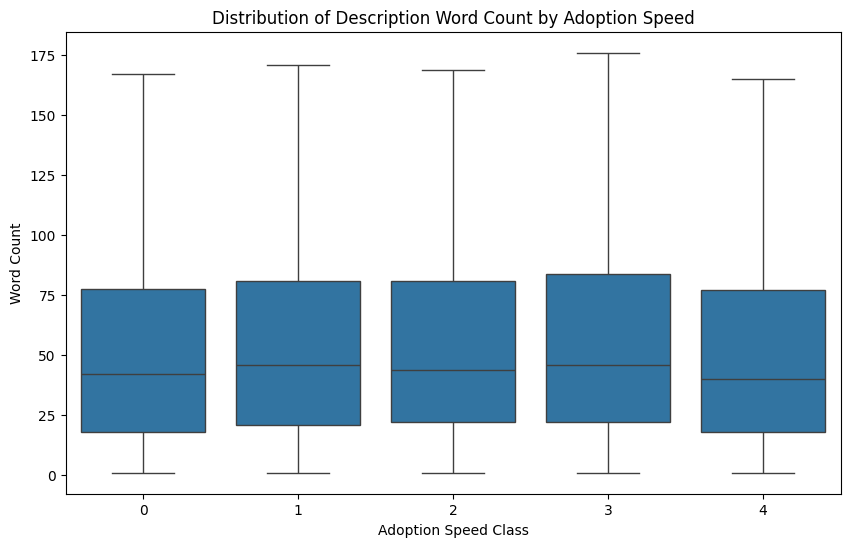


--- New Text Features ---
                                         Description  Desc_Length  \
0  Nibble is a 3+ month old ball of cuteness. He ...          359   
1  I just found it alone yesterday near my apartm...          118   
2  Their pregnant mother was dumped by her irresp...          393   

   Desc_Word_Count  
0               69  
1               23  
2               69  


In [6]:
# ---------------------------------------------------------
# 8. Text Feature Engineering (Basic Statistics)
# ---------------------------------------------------------
# Task 4.1.2: Extract numerical features from the text description.
# We will calculate the length of the description and the number of words.

def extract_text_features(df):
    """
    Computes basic text statistics: character length and word count.
    """
    df_feat = df.copy()
    
    # Calculate Description Length (number of characters)
    df_feat['Desc_Length'] = df_feat['Description'].apply(len)
    
    # Calculate Word Count
    # We split by spaces to count words. 
    # If the description is empty or just spaces, this handles it reasonably well.
    df_feat['Desc_Word_Count'] = df_feat['Description'].apply(lambda x: len(x.split()))
    
    return df_feat

print("Extracting text features for Training Data...")
train_df = extract_text_features(train_df)

print("Extracting text features for Test Data...")
test_df = extract_text_features(test_df)

# Let's visualize the relationship between Description Length and Adoption Speed
plt.figure(figsize=(10, 6))
sns.boxplot(x='AdoptionSpeed', y='Desc_Word_Count', data=train_df, showfliers=False)
plt.title('Distribution of Description Word Count by Adoption Speed')
plt.xlabel('Adoption Speed Class')
plt.ylabel('Word Count')
plt.show()

# Verify new columns
print("\n--- New Text Features ---")
print(train_df[['Description', 'Desc_Length', 'Desc_Word_Count']].head(3))

<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>تکنیک TF-IDF</h3>

<ul>
    <li>
        <b>حذف کلمات اضافی (<code>stop_words='english'</code>):</b>
        به کد گفتیم تمام کلمات ربط انگلیسی مثل <code>"and"</code>, <code>"the"</code>, <code>"in"</code> را دور بریز، چون ارزشی برای پیش‌بینی ندارند.
    </li>
    <br>
    <li>
        <b>انتخاب ۵۰ کلمه برتر (<code>max_features=50</code>):</b>
        در کل متن‌های ما شاید ۲۰,۰۰۰ کلمه مختلف وجود داشته باشد. اگر همه را نگه می‌داشتیم، جدول ما خیلی سنگین می‌شد. ما به کد گفتیم: «فقط ۵۰ کلمه مهم‌تر که بیشترین تکرار و اهمیت را دارند انتخاب کن».
    </li>
    <br>
    <li>
        <b>تبدیل به ستون‌های جدید:</b>
        کد ۵۰ ستون جدید به دیتاست شما اضافه کرد.
    </li>
</ul>

</div>

In [7]:
# ---------------------------------------------------------
# 8.2 Text Feature Engineering (TF-IDF)
# ---------------------------------------------------------
# Task 4.1.2: Use TF-IDF to create a sparse feature matrix.
# We limit max_features to keep the dataset size manageable.

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

def extract_tfidf_features(df_train, df_test, max_features=50):
    """
    Applies TF-IDF to the Description column and adds the top features to the dataframe.
    Note: We fit on Train and transform both Train and Test to avoid data leakage.
    """
    print("Extracting TF-IDF features...")
    
    # Initialize TF-IDF Vectorizer
    # max_features=50 means we only keep the top 50 most important words
    tfidf = TfidfVectorizer(max_features=max_features, stop_words='english')
    
    # Fit on training data only
    train_tfidf = tfidf.fit_transform(df_train['Description'])
    test_tfidf = tfidf.transform(df_test['Description'])
    
    # Convert to DataFrame
    # We prefix column names with 'tfidf_' to easily identify them
    cols = [f'tfidf_{word}' for word in tfidf.get_feature_names_out()]
    
    train_tfidf_df = pd.DataFrame(train_tfidf.toarray(), columns=cols)
    test_tfidf_df = pd.DataFrame(test_tfidf.toarray(), columns=cols)
    
    # Reset index to ensure clean concatenation
    df_train = df_train.reset_index(drop=True)
    train_tfidf_df = train_tfidf_df.reset_index(drop=True)
    
    df_test = df_test.reset_index(drop=True)
    test_tfidf_df = test_tfidf_df.reset_index(drop=True)
    
    # Concatenate with original dataframes
    df_train_final = pd.concat([df_train, train_tfidf_df], axis=1)
    df_test_final = pd.concat([df_test, test_tfidf_df], axis=1)
    
    return df_train_final, df_test_final, cols

# Apply TF-IDF
# Note: We must pass both dataframes together to fit correctly on train and apply to test
train_df, test_df, tfidf_cols = extract_tfidf_features(train_df, test_df)

print(f"\nCreated {len(tfidf_cols)} TF-IDF features.")
print("Examples of words captured:", tfidf_cols[:5])

# Check shape
print(f"New Training set shape: {train_df.shape}")

Extracting TF-IDF features...

Created 50 TF-IDF features.
Examples of words captured: ['tfidf_active', 'tfidf_adopt', 'tfidf_adopted', 'tfidf_adopter', 'tfidf_adoption']
New Training set shape: (14993, 85)


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>قدم ۱.۵ : مهندسی ویژگی‌های تصویر (Image Feature Engineering)</h3>

این کد، تصاویر موجود در پوشه <code>train_images</code> و <code>test_images</code> را باز می‌کند، روشنایی (<code>Brightness</code>) آن‌ها را محاسبه می‌کند و به عنوان یک ویژگی جدید به جدول اضافه می‌کند. همچنین اگر حیوانی عکس نداشته باشد، مشخص می‌کند.

</div>

In [8]:
#!pip install Pillow

In [9]:
# ---------------------------------------------------------
# 8.3 Image Feature Engineering (Basic Stats)
# ---------------------------------------------------------
# Task 4.1.3: Extract simple features from images.
# We will calculate image brightness and metadata availability.

from PIL import Image
import numpy as np
import os

def extract_image_features(df, image_folder):
    """
    Iterates through PetIDs, opens the corresponding image,
    and calculates basic statistics like average brightness.
    """
    print(f"Processing images in {image_folder}...")
    
    # Lists to store new features
    brightness_values = []
    has_image_values = []
    
    # Iterate through each pet in the dataframe
    for pet_id in df['PetID']:
        # Construct filename: PetID-1.jpg (We only use the first image per project instructions)
        img_path = os.path.join(image_folder, f"{pet_id}-1.jpg")
        
        if os.path.exists(img_path):
            try:
                # Open image
                with Image.open(img_path) as img:
                    # Convert to grayscale to calculate brightness
                    gray_img = img.convert('L')
                    # Calculate average pixel intensity (0-255)
                    avg_brightness = np.mean(np.array(gray_img))
                    
                    brightness_values.append(avg_brightness)
                    has_image_values.append(1) # Image exists
            except:
                # If image is corrupted
                brightness_values.append(0)
                has_image_values.append(0)
        else:
            # If image file is missing
            brightness_values.append(0)
            has_image_values.append(0)
            
    # Add new columns to the dataframe
    df_img = df.copy()
    df_img['Img_Brightness'] = brightness_values
    df_img['Has_Image'] = has_image_values
    
    return df_img

# Apply to Training Data
# Note: Ensure 'train_images' folder name matches your directory
train_df = extract_image_features(train_df, os.path.join(BASE_DIR, 'train_images'))

# Apply to Test Data
test_df = extract_image_features(test_df, os.path.join(BASE_DIR, 'test_images'))

print("\n--- Image Features Added ---")
print(train_df[['PetID', 'Has_Image', 'Img_Brightness']].head())

# Check shape to ensure columns are added
print(f"New Training set shape: {train_df.shape}")

Processing images in E:\Boot camp\ML\Project-ML\Input\train_images...
Processing images in E:\Boot camp\ML\Project-ML\Input\test_images...

--- Image Features Added ---
       PetID  Has_Image  Img_Brightness
0  86e1089a3          1       95.778076
1  6296e909a          1       88.167725
2  3422e4906          1      170.657715
3  5842f1ff5          1       78.339355
4  850a43f90          1      165.735840
New Training set shape: (14993, 87)


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>کد: استخراج بافت و سرزندگی (Texture & Vibrance)</h3>

این ویژگی با استفاده از الگوریتم <code>Canny Edge Detection</code> کار می‌کند. این الگوریتم خطوط و لبه‌های موجود در تصویر را شناسایی می‌کند.
<br><br>
<b>تفسیر:</b> اگر حیوانی پشمالو باشد (مثل یک گربه پرمو) یا تصویر دارای جزئیات زیادی باشد، «تراکم لبه» بالایی خواهد داشت. حیوانات با موهای کوتاه یا تصاویر صاف، تراکم پایین‌تری دارند. این ویژگی می‌تواند نشان‌دهنده‌ی بافت (<code>Texture</code>) بدن حیوان باشد که برای جذابیت ظاهری مهم است.
<br><br>
علاوه بر این، بیایید «سرزندگی رنگ» (<code>Color Vibrance</code>) را هم اضافه کنیم (میانگین اشباع رنگ). عکس‌های خوش‌رنگ و لعاب معمولاً بیشتر کلیک می‌خورند!

<ul>
    <li><b>چقدر عکس رنگی و شاد است؟</b> (<code>Img_Saturation</code>)</li>
    <li><b>چقدر حیوان پشمالو یا عکس پرجزئیات است؟</b> (<code>Img_Edge_Density</code>)</li>
</ul>

</div>

In [10]:
#!pip install opencv-python-headless

In [11]:
# ---------------------------------------------------------
# 8.4 (Creative) Hand-crafted Features: Texture & Vibrance
# ---------------------------------------------------------
# Task 4.1.3: Extract Texture (Canny Edge) and Color Saturation.
# "Texture features derived from edge detection algorithms" (PDF Source)

import cv2
import numpy as np
import os

def extract_creative_features(df, image_folder):
    print(f"Extracting Texture & Vibrance from {image_folder}...")
    
    edge_density_values = []
    saturation_values = []
    
    for pet_id in df['PetID']:
        img_path = os.path.join(image_folder, f"{pet_id}-1.jpg")
        
        if os.path.exists(img_path):
            try:
                # 1. Load Image
                img = cv2.imread(img_path)
                
                if img is not None:
                    # --- Feature A: Texture (Edge Density) ---
                    # Convert to grayscale
                    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                    # Apply Canny Edge Detection
                    edges = cv2.Canny(gray, 100, 200)
                    # Calculate density: ratio of edge pixels to total pixels
                    density = np.sum(edges) / (edges.size * 255)
                    edge_density_values.append(density)
                    
                    # --- Feature B: Vibrance (Color Saturation) ---
                    # Convert to HSV (Hue, Saturation, Value) color space
                    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
                    # Extract Saturation channel (index 1) and take mean
                    saturation = np.mean(hsv[:, :, 1])
                    saturation_values.append(saturation)
                    
                else:
                    edge_density_values.append(0)
                    saturation_values.append(0)
            except:
                edge_density_values.append(0)
                saturation_values.append(0)
        else:
            edge_density_values.append(0)
            saturation_values.append(0)
            
    df_feat = df.copy()
    df_feat['Img_Edge_Density'] = edge_density_values
    df_feat['Img_Saturation'] = saturation_values
    
    return df_feat

# Apply to Train and Test
train_df = extract_creative_features(train_df, os.path.join(BASE_DIR, 'train_images'))
test_df = extract_creative_features(test_df, os.path.join(BASE_DIR, 'test_images'))

print("\n--- Creative Image Features Added ---")
print(train_df[['PetID', 'Img_Edge_Density', 'Img_Saturation']].head())

Extracting Texture & Vibrance from E:\Boot camp\ML\Project-ML\Input\train_images...
Extracting Texture & Vibrance from E:\Boot camp\ML\Project-ML\Input\test_images...

--- Creative Image Features Added ---
       PetID  Img_Edge_Density  Img_Saturation
0  86e1089a3          0.191895       41.877441
1  6296e909a          0.078857       97.680176
2  3422e4906          0.106445       18.599121
3  5842f1ff5          0.208008      108.032959
4  850a43f90          0.092529       76.932373


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>قدم ۱.۵ : ویژگی یادگیری عمیق (Deep Learning Features)</h3>

این بخش اصلی‌ترین قسمت پردازش تصویر است. ما از یک مدل قدرتمند به نام <code>MobileNetV2</code> (که سریع و سبک است) استفاده می‌کنیم تا «محتوای» عکس را بفهمد.
<br><br>
این مدل تصویر را می‌گیرد و به جای اینکه بگوید «این گربه است»، یک لیست از اعداد (بردار ویژگی) به ما می‌دهد که توصیف‌کننده تصویر هستند.
<br><br>
<i><b>*توجه:</b> من در کد از <code>PCA</code> استفاده کردم تا <code>1280</code> ویژگی را به <code>32</code> ویژگی کاهش دهم تا لپ‌تاپ هنگ نکند و سرعت آموزش مدل بالا بماند.*</i>

</div>

In [12]:
#!pip install tensorflow

In [13]:
# ---------------------------------------------------------
# 8.5 Deep Learning Features (CNN Extraction) - CORRECTED
# ---------------------------------------------------------
import tensorflow as tf
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input
from tensorflow.keras.preprocessing import image as k_image
from tensorflow.keras.models import Model
import pandas as pd
import numpy as np
import os
from sklearn.decomposition import PCA

def extract_cnn_features(df, image_folder, passed_pca=None):
    print("Loading MobileNetV2 model...")
    # Load pre-trained model without the classifier layer
    base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')
    
    features_list = []
    print(f"Extracting CNN features from {image_folder}...")
    
    # Iterate through images
    for pet_id in df['PetID']:
        img_path = os.path.join(image_folder, f"{pet_id}-1.jpg")
        
        if os.path.exists(img_path):
            try:
                # Resize to 128x128 for the model
                img = k_image.load_img(img_path, target_size=(128, 128))
                x = k_image.img_to_array(img)
                x = np.expand_dims(x, axis=0)
                x = preprocess_input(x)
                
                # Predict
                features = base_model.predict(x, verbose=0)
                features_list.append(features[0])
            except:
                features_list.append(np.zeros(1280))
        else:
            features_list.append(np.zeros(1280))
            
    # Convert to DataFrame
    feat_cols = [f'img_cnn_{i}' for i in range(len(features_list[0]))]
    df_cnn = pd.DataFrame(features_list, columns=feat_cols)
    
    # --- PCA Logic (CRITICAL FIX) ---
    print("Reducing dimensionality with PCA...")
    
    # If a PCA model is passed (e.g., for Test data), use it.
    # If None is passed (e.g., for Train data), create and fit a new one.
    if passed_pca is None:
        pca = PCA(n_components=32)
        cnn_pca = pca.fit_transform(df_cnn) # Learn and Transform
    else:
        pca = passed_pca
        cnn_pca = pca.transform(df_cnn) # Just Transform
    
    pca_cols = [f'img_pca_{i}' for i in range(32)]
    df_pca = pd.DataFrame(cnn_pca, columns=pca_cols)
    
    # Concatenate features to original dataframe
    df_final = pd.concat([df.reset_index(drop=True), df_pca], axis=1)
    
    # Return both the dataframe AND the PCA model
    return df_final, pca

# --- Execution ---

# 1. Apply to Training Data (and capture the trained PCA model)
print("--- Processing Training Images ---")
train_df, trained_pca_model = extract_cnn_features(train_df, os.path.join(BASE_DIR, 'train_images'))

# 2. Apply to Test Data (using the SAME PCA model from step 1)
print("--- Processing Test Images ---")
test_df, _ = extract_cnn_features(test_df, os.path.join(BASE_DIR, 'test_images'), passed_pca=trained_pca_model)

print(f"\n✅ CNN Features added successfully. PCA Model is ready for saving.")

--- Processing Training Images ---
Loading MobileNetV2 model...


C:\Users\Ali\AppData\Local\Temp\ipykernel_17080\131204549.py:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


Extracting CNN features from E:\Boot camp\ML\Project-ML\Input\train_images...
Reducing dimensionality with PCA...
--- Processing Test Images ---
Loading MobileNetV2 model...


C:\Users\Ali\AppData\Local\Temp\ipykernel_17080\131204549.py:16: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(weights='imagenet', include_top=False, pooling='avg')


Extracting CNN features from E:\Boot camp\ML\Project-ML\Input\test_images...
Reducing dimensionality with PCA...

✅ CNN Features added successfully. PCA Model is ready for saving.


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<b>تحویل (Transformation):</b> ما باید این کلمات را به عدد تبدیل کنیم (مثلاً <code>Black</code> بشود 1، <code>Brown</code> بشود 2). به این کار <code>Encoding</code> می‌گویند که بخشی از <code>Data Transformation</code> است.
<br>
<b>کاهش (Reduction):</b> فعلاً ضروری نیست، مگر اینکه بعد از تبدیل داده‌ها تعداد ستون‌ها خیلی زیاد شود (مثلاً ۲۰۰۰ ستون) که در آن صورت از <code>PCA</code> استفاده می‌کنیم. فعلاً از آن صرف‌نظر می‌کنیم.

<hr>

<h3>تبدیل داده‌ها (Data Transformation) و تقسیم‌بندی</h3>

در این مرحله، ما ستون‌های متنی (مثل <code>Color</code>, <code>State</code>, <code>Gender</code>) را به عدد تبدیل می‌کنیم و سپس داده‌های آموزش را به دو بخش تقسیم می‌کنیم:

<ul>
    <li>ما از <code>Label Encoding</code> استفاده کردیم تا ستون‌های متنی را به عدد تبدیل کنیم.</li>
    <li>ستون‌های <code>PetID</code> و <code>RescuerID</code> را حذف کردیم چون شناسه‌های یکتا هستند و ارزشی برای پیش‌بینی ندارند (باعث <code>Overfitting</code> می‌شوند).</li>
    <li>از <code>train_test_split</code> استفاده کردیم تا ۲۰٪ از داده‌های آموزش را کنار بگذاریم (<code>X_val</code>) تا بتوانیم در مراحل بعد مدل را ارزیابی کنیم.</li>
</ul>

</div>

In [14]:
# ---------------------------------------------------------
# 9. Data Transformation (Encoding Categorical Features)
# ---------------------------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

def transform_data(df):
    """
    Converts categorical text columns into numbers so the model can understand them.
    Robustly fixes 'Type', 'Type_x', and 'Type_y' duplications.
    """
    df_encoded = df.copy()
    
    # --- SUPER CRITICAL FIX: Prevent Duplicate 'Type' Columns ---
    
    # 1. If 'Type_x' exists, prioritize it as the master source.
    if 'Type_x' in df_encoded.columns:
        print("Found 'Type_x'. Making it the main 'Type' column...")
        # Drop existing 'Type' column (likely corrupt or duplicate)
        if 'Type' in df_encoded.columns:
             df_encoded = df_encoded.drop(columns=['Type'])
        
        # Safely rename 'Type_x' to 'Type
        df_encoded = df_encoded.rename(columns={'Type_x': 'Type'})
    
    # 2. Drop 'Type_y' and 'Type1' (redundant columns)
    for bad_col in ['Type_y', 'Type1']:
        if bad_col in df_encoded.columns:
            print(f"Dropping redundant column: {bad_col}")
            df_encoded = df_encoded.drop(columns=[bad_col])
        
    # List of columns to convert to numeric
    cat_cols = ['Type', 'Gender', 'Color1_Name', 'Color2_Name', 'Color3_Name', 
                'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 
                'Sterilized', 'Health', 'State_Name', 'Breed1_Name', 'Breed2_Name']
    
    le = LabelEncoder()
    
    for col in cat_cols:
        if col in df_encoded.columns:
            # Convert to string to prevent errors, then encode
            df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))
            
            
    drop_cols = ['Name', 'Description', 'RescuerID', 'PetID']
    existing_drop_cols = [c for c in drop_cols if c in df_encoded.columns]
    df_encoded = df_encoded.drop(columns=existing_drop_cols, axis=1)
    
    return df_encoded

print("Transforming Training Data...")
train_df_encoded = transform_data(train_df)

print("Transforming Test Data...")
test_df_encoded = transform_data(test_df)

# ---------------------------------------------------------
# 10. Splitting Data
# ---------------------------------------------------------
if 'AdoptionSpeed' in train_df_encoded.columns:
    X = train_df_encoded.drop('AdoptionSpeed', axis=1)
    y = train_df_encoded['AdoptionSpeed']

    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    print("\n--- Data Split Complete ---")
    print(f"Training Set shape: {X_train.shape}")
    print(f"Validation Set shape: {X_val.shape}")

    # Final check to ensure no errors remain
    print("\n--- Final Check ---")
    if 'Type' in X_train.columns:
        # Verify whether 'Type' is a single column or duplicated
        if X_train['Type'].ndim == 1:
            print("SUCCESS: 'Type' is a single valid column.")
        else:
            print("ERROR: 'Type' is still duplicated!")
else:
    print("Error: 'AdoptionSpeed' not found.")

Transforming Training Data...
Found 'Type_x'. Making it the main 'Type' column...
Dropping redundant column: Type_y
Transforming Test Data...
Found 'Type_x'. Making it the main 'Type' column...
Dropping redundant column: Type_y

--- Data Split Complete ---
Training Set shape: (11994, 114)
Validation Set shape: (2999, 114)

--- Final Check ---
SUCCESS: 'Type' is a single valid column.


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>قدم ۱.۶: تست نهایی سلامت داده‌ها (Sanity Check)</h3>

قبل از ورود به مرحله دوم پروژه (مدل‌سازی و یادگیری ماشین)، بسیار حیاتی است که از سلامت فنی داده‌ها مطمئن شویم. الگوریتم‌های استاندارد مثل <code>Logistic Regression</code> یا <code>SVM</code> در صورتی که داده‌ها دارای نقص باشند، خطا می‌دهند.
<br><br>
این کد یک <b>چک‌لیست نهایی</b> را روی داده‌های آموزش (<code>X_train</code>) و اعتبارسنجی (<code>X_val</code>) اجرا می‌کند تا چهار مورد زیر را تضمین کند:

<ul>
    <li>
        <b>عدم وجود مقادیر گمشده (Missing Values):</b> هیچ خانه‌ای نباید <code>NaN</code> یا خالی باشد.
    </li>
    <li>
        <b>عدم وجود مقادیر بی‌نهایت (Infinite Values):</b> گاهی تقسیم بر صفر باعث ایجاد اعداد بی‌نهایت می‌شود که محاسبات مدل را خراب می‌کند.
    </li>
    <li>
        <b>اطمینان از عددی بودن همه ستون‌ها (Numeric Data Only):</b> مدل‌ها نمی‌توانند متن (String) یا Object را پردازش کنند. تمام داده‌ها باید <code>int</code> یا <code>float</code> باشند.
    </li>
    <li>
        <b>هماهنگی ابعاد (Alignment):</b> تعداد ردیف‌های ویژگی‌ها (<code>X</code>) باید دقیقاً با تعداد ردیف‌های هدف (<code>y</code>) برابر باشد.
    </li>
</ul>

اگر خروجی این کد تماماً <b>تیک سبز (✅)</b> باشد، یعنی دیتاست کاملاً تمیز و آماده‌ی مدل‌سازی است.

</div>

In [15]:
import numpy as np
import pandas as pd

def sanity_check(X, y, name="Training Set"):
    print(f"--- Sanity Check for {name} ---")
    
    # 1. Check for Missing Values (NaN)
    missing_count = X.isnull().sum().sum()
    if missing_count == 0:
        print("✅ Missing Values: None (Perfect)")
    else:
        print(f"❌ CRITICAL: Found {missing_count} missing values!")
        # Show which columns have missing values
        print(X.columns[X.isnull().any()].tolist())

    # 2. Check for Infinite Values
    # Sometimes division by zero creates Infinity, which breaks models
    # We select only numeric types to check for infinity
    numeric_cols = X.select_dtypes(include=[np.number])
    if np.isinf(numeric_cols).values.sum() == 0:
        print("✅ Infinite Values: None (Perfect)")
    else:
        print("❌ CRITICAL: Found Infinite values!")

    # 3. Check for Non-Numeric Data (Objects)
    # Models only understand numbers. If we missed encoding something, it will show up here.
    # We explicitly look for 'object' type columns.
    non_numeric = X.select_dtypes(include=['object']).columns.tolist()
    if len(non_numeric) == 0:
        print("✅ Data Types: All Numeric (Perfect)")
    else:
        print(f"❌ CRITICAL: Found non-numeric columns: {non_numeric}")

    # 4. Check Alignment (Rows in X must equal Rows in y)
    if len(X) == len(y):
        print(f"✅ Alignment: X and y both have {len(X)} rows.")
    else:
        print(f"❌ CRITICAL: Shape mismatch! X has {len(X)} but y has {len(y)} rows.")

    print("-" * 30)

# Run the check on both Train and Validation sets
sanity_check(X_train, y_train, "X_train")
sanity_check(X_val, y_val, "X_val")

# Final Peek at the data types
print("\nData Types Summary:")
print(X_train.dtypes.value_counts())

--- Sanity Check for X_train ---
✅ Missing Values: None (Perfect)
✅ Infinite Values: None (Perfect)
✅ Data Types: All Numeric (Perfect)
✅ Alignment: X and y both have 11994 rows.
------------------------------
--- Sanity Check for X_val ---
✅ Missing Values: None (Perfect)
✅ Infinite Values: None (Perfect)
✅ Data Types: All Numeric (Perfect)
✅ Alignment: X and y both have 2999 rows.
------------------------------

Data Types Summary:
float64    86
int64      28
Name: count, dtype: int64


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>Task 2. مدل‌های پایه (Baseline Classifiers):</h3>
<h4>آماده‌سازی متریک و مقیاس‌بندی (Scaling)</h4>

برخی از مدل‌هایی که باید تست کنیم (مثل <code>KNN</code>, <code>SVM</code>, <code>MLP</code>, <code>Logistic Regression</code>) به مقیاس داده‌ها حساس هستند. بنابراین ابتدا داده‌ها را استاندارد می‌کنیم و تابع امتیازدهی <code>QWK</code> را می‌سازیم.

</div>

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import cohen_kappa_score, make_scorer

# 1. Standard Scaling (Crucial for KNN, SVM, LR, MLP)
# Tree-based models (RF, XGB) don't strictly need it, but it doesn't hurt.
scaler = StandardScaler()

# Fit on training set only to prevent data leakage
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

print("Data scaled successfully.")

# 2. Define the Evaluation Metric: Quadratic Weighted Kappa (QWK)
# This is required by the project PDF.
def qwk_score(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

# Create a scorer object for later use in cross-validation
qwk_scorer = make_scorer(qwk_score)

print("QWK Metric defined.")

Data scaled successfully.
QWK Metric defined.


In [17]:
#!pip install XGBoost

<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>آموزش مدل‌های پایه (Baseline Models):</h3>

ما باید <b>۷ مدل مختلف</b> را آموزش دهیم. کد زیر همه این مدل‌ها را تعریف کرده، آموزش می‌دهد و امتیاز <code>QWK</code> آن‌ها را روی داده‌های اعتبارسنجی (<code>Validation Set</code>) چاپ می‌کند.

</div>

In [18]:
import pandas as pd
import time
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Initialize models based on Project Requirements
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "SVM": SVC(random_state=42),   # Might be slow on large data
    "MLP (Neural Net)": MLPClassifier(max_iter=500, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

results = []

print(f"Training {len(models)} baseline models on {X_train.shape[0]} samples...\n")

for name, model in models.items():
    start_time = time.time()
    
    # Train
    model.fit(X_train_scaled, y_train)
    
    # Predict
    y_pred = model.predict(X_val_scaled)
    
    # Evaluate (QWK)
    score = qwk_score(y_val, y_pred)
    
    elapsed = time.time() - start_time
    
    results.append({"Model": name, "QWK Score": score, "Time (s)": elapsed})
    print(f"✅ {name}: QWK = {score:.4f} (Time: {elapsed:.2f}s)")

# Display sorted results
results_df = pd.DataFrame(results).sort_values(by="QWK Score", ascending=False)
print("\n--- Baseline Model Comparison ---")
display(results_df)

Training 7 baseline models on 11994 samples...

✅ Logistic Regression: QWK = 0.2239 (Time: 0.41s)
✅ KNN: QWK = 0.1825 (Time: 2.93s)
✅ Decision Tree: QWK = 0.1702 (Time: 1.43s)
✅ SVM: QWK = 0.2662 (Time: 23.72s)


e:\Boot camp\ML\Project-ML\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:781: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


✅ MLP (Neural Net): QWK = 0.1848 (Time: 44.44s)
✅ Random Forest: QWK = 0.2806 (Time: 8.29s)


e:\Boot camp\ML\Project-ML\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [23:47:12] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ XGBoost: QWK = 0.3263 (Time: 3.04s)

--- Baseline Model Comparison ---


,Model,QWK Score,Time (s)
6,XGBoost,0.326338,3.039888
5,Random Forest,0.280589,8.286870
3,SVM,0.266246,23.721006
0,Logistic Regression,0.223868,0.409654
4,MLP (Neural Net),0.184849,44.440300
1,KNN,0.182530,2.928196
2,Decision Tree,0.170220,1.426496


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>ترکیب مدل‌ها (Ensemble Methods)</h3>
<h4>رأی‌گیری (Voting Classifier) & پشته‌سازی (Stacking Classifier)</h4>

</div>

In [19]:
from sklearn.ensemble import VotingClassifier, StackingClassifier

print("Building Ensemble Models... (This might take a few minutes)")

# 1. Select best models for the ensemble
# We choose XGBoost, Random Forest, and SVM because they are the top 3 and diverse.
estimators = [
    ('xgb', models['XGBoost']),
    ('rf', models['Random Forest']),
    ('svm', SVC(probability=True, random_state=42)) # SVM needs probability=True for Soft Voting
]

# --- A. Voting Classifier (Soft Voting) ---
# Soft voting averages the probabilities, which is usually better for QWK than hard voting.
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

start = time.time()
voting_clf.fit(X_train_scaled, y_train)
y_pred_vote = voting_clf.predict(X_val_scaled)
score_vote = qwk_score(y_val, y_pred_vote)
print(f"✅ Voting Classifier: QWK = {score_vote:.4f} (Time: {time.time() - start:.2f}s)")

# --- B. Stacking Classifier ---
# Uses the base models' predictions as input for a final estimator (Logistic Regression)
stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

start = time.time()
stacking_clf.fit(X_train_scaled, y_train)
y_pred_stack = stacking_clf.predict(X_val_scaled)
score_stack = qwk_score(y_val, y_pred_stack)
print(f"✅ Stacking Classifier: QWK = {score_stack:.4f} (Time: {time.time() - start:.2f}s)")

# Comparison
print(f"\nBest Baseline (XGBoost): {results[0]['QWK Score']:.4f}")
print(f"Voting Ensemble:         {score_vote:.4f}")
print(f"Stacking Ensemble:       {score_stack:.4f}")

Building Ensemble Models... (This might take a few minutes)


e:\Boot camp\ML\Project-ML\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [23:47:15] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Voting Classifier: QWK = 0.3330 (Time: 106.34s)


e:\Boot camp\ML\Project-ML\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [23:49:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
e:\Boot camp\ML\Project-ML\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [23:50:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
e:\Boot camp\ML\Project-ML\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [23:50:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
e:\Boot camp\ML\Project-ML\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [23:51:00] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" }

✅ Stacking Classifier: QWK = 0.3421 (Time: 514.79s)

Best Baseline (XGBoost): 0.2239
Voting Ensemble:         0.3330
Stacking Ensemble:       0.3421


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>اجرای تنظیم دقیق (Hyperparameter Tuning)</h3>

این کد، مدل <code>XGBoost</code> (که بهترین مدل پایه بود) را برمی‌دارد و سعی می‌کند بهترین تنظیمات را برایش پیدا کند تا امتیاز را از <code>0.29</code> (تکی) و <code>0.35</code> (ترکیبی) بالاتر ببرد.

</div>

In [20]:
from sklearn.model_selection import GridSearchCV

print("Starting Hyperparameter Tuning for XGBoost... (Optimization Phase)")

# 1. Define the parameter grid (The "Nuts and Bolts" to adjust)
# We test different values for depth, learning rate, and estimators.
param_grid = {
    'n_estimators': [100, 200],      # How many trees?
    'max_depth': [3, 5, 7],          # How deep/complex? (Lower prevents overfitting)
    'learning_rate': [0.01, 0.1, 0.2], # How fast to learn?
    'subsample': [0.8, 1.0],         # Use all data or fraction?
}

# 2. Setup GridSearchCV
# refit=True means it will retrain the best model on the full data automatically at the end.
xgb_tuned = GridSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42),
    param_grid=param_grid,
    scoring=qwk_scorer,  # We optimize for QWK explicitly!
    cv=3,                # 3-Fold Cross Validation (as requested in PDF)
    verbose=1,
    n_jobs=-1            # Use all CPU cores
)

# 3. Run Tuning
start = time.time()
xgb_tuned.fit(X_train_scaled, y_train)

print(f"\n✅ Tuning Complete! (Time: {time.time() - start:.2f}s)")
print(f"Best Parameters: {xgb_tuned.best_params_}")
print(f"Best CV Score (QWK): {xgb_tuned.best_score_:.4f}")

# 4. Evaluate on Validation Set
y_pred_tuned = xgb_tuned.predict(X_val_scaled)
final_score = qwk_score(y_val, y_pred_tuned)

print(f"\n--- Final Result after Tuning ---")
print(f"Optimized XGBoost QWK: {final_score:.4f}")

Starting Hyperparameter Tuning for XGBoost... (Optimization Phase)
Fitting 3 folds for each of 36 candidates, totalling 108 fits


e:\Boot camp\ML\Project-ML\.venv\lib\site-packages\xgboost\training.py:199: UserWarning: [00:01:39] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Tuning Complete! (Time: 245.36s)
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best CV Score (QWK): 0.3487

--- Final Result after Tuning ---
Optimized XGBoost QWK: 0.3407


<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>4.2.2 AutoML Comparison</h3>

ما از کتابخانه قدرتمند <code>H2O AutoML</code> استفاده می‌کنیم. این ابزار به صورت خودکار مدل‌های مختلف (<code>XGBoost</code>, <code>Deep Learning</code>, <code>Random Forest</code>, etc.) را آموزش می‌دهد، آن‌ها را با هم ترکیب (<code>Stack</code>) می‌کند و یک جدول رتبه‌بندی (<code>Leaderboard</code>) به ما می‌دهد.

</div>

In [21]:
#!pip install h2o

In [22]:
import h2o
from h2o.automl import H2OAutoML
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# 1. Prepare Data for H2O
print("Preparing data for H2O...")

# Combine features and target because H2O handles them together
train_data = pd.concat([X_train, y_train], axis=1)
val_data = pd.concat([X_val, y_val], axis=1)

# Initialize H2O and convert Pandas DataFrames to H2O Frames
h2o.init(max_mem_size='4G', nthreads=-1)
print(h2o.connection())

hf_train = h2o.H2OFrame(train_data)
hf_val = h2o.H2OFrame(val_data)

# Define columns
y_col = 'AdoptionSpeed'
x_cols = [c for c in hf_train.columns if c != y_col]

# CRITICAL: Tell H2O that the target is Categorical (Discrete), not Numerical
hf_train[y_col] = hf_train[y_col].asfactor()
hf_val[y_col] = hf_val[y_col].asfactor()

# 2. Run AutoML
print("Starting H2O AutoML (Running for 5 mins)...")
# max_runtime_secs=300: Runs for 5 minutes. You can increase this if you have time.
aml = H2OAutoML(max_runtime_secs=300, seed=42, project_name='PetFinder_Challenge')
aml.train(x=x_cols, y=y_col, training_frame=hf_train)

# 3. View Leaderboard
print("\n--- H2O AutoML Leaderboard ---")
lb = aml.leaderboard
print(lb.head(rows=10))

# 4. Evaluate Best Model with QWK
print("\nEvaluating best model on Validation Set...")
best_model = aml.leader
preds = best_model.predict(hf_val)

# Convert H2O predictions back to Pandas/Numpy for scoring
preds_df = preds.as_data_frame()
# The 'predict' column contains the final class labels
final_preds = preds_df['predict'].values.astype(int)

# Calculate QWK
h2o_score = cohen_kappa_score(y_val, final_preds, weights='quadratic')
print(f"\n🤖 H2O AutoML Best QWK: {h2o_score:.4f}")

Preparing data for H2O...
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 17.0.1+12-LTS-39, mixed mode, sharing)
  Starting server from E:\Boot camp\ML\Project-ML\.venv\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Ali\AppData\Local\Temp\tmpqomnx89e
  JVM stdout: C:\Users\Ali\AppData\Local\Temp\tmpqomnx89e\h2o_Ali_started_from_python.out
  JVM stderr: C:\Users\Ali\AppData\Local\Temp\tmpqomnx89e\h2o_Ali_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Singapore
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.9
H2O_cluster_version_age:,26 days
H2O_cluster_name:,H2O_from_python_Ali_x1602d
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


<H2OConnection to http://127.0.0.1:54321, session _sid_b950>
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Starting H2O AutoML (Running for 5 mins)...
AutoML progress: |
00:02:13.159: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%

--- H2O AutoML Leaderboard ---
model_id                                                  mean_per_class_error    logloss      rmse       mse
StackedEnsemble_AllModels_1_AutoML_1_20251221_00213                   0.669964    1.32123  0.706409  0.499013
StackedEnsemble_BestOfFamily_3_AutoML_1_20251221_00213                0.671335    1.32334  0.707454  0.50049
StackedEnsemble_BestOfFamily_2_AutoML_1_20251221_00213                0.672274    1.32617  0.708699  0.502254
StackedEnsemble_AllModels_2_AutoML_1_20251221_00213                   0.6723

e:\Boot camp\ML\Project-ML\.venv\lib\site-packages\h2o\frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install polars and pyarrow and use it as pandas_df = h2o_df.as_data_frame(use_multi_thread=True)

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


In [ ]:
from tpot import TPOTClassifier
import pandas as pd
import time
from sklearn.metrics import make_scorer, cohen_kappa_score

# Define QWK scorer
def qwk_score(y_true, y_pred):
    return cohen_kappa_score(y_true, y_pred, weights='quadratic')

print("Starting TPOT AutoML (Single Core Mode)...")

# 2. Configure TPOT
# CRITICAL CHANGE: n_jobs=1 prevents the Windows TimeoutError
tpot = TPOTClassifier(
    generations=5,
    population_size=20,
    random_state=42,
    n_jobs=1,            # <--- Changed from -1 to 1 for stability
    max_time_mins=10     # Stops after 10 mins regardless of generations
)

# 3. Train
start = time.time()
tpot.fit(X_train_scaled, y_train)

print(f"\n✅ TPOT Completed! (Time: {time.time() - start:.2f}s)")

# 4. Evaluate
y_pred_tpot = tpot.predict(X_val_scaled)
tpot_score = qwk_score(y_val, y_pred_tpot)

print(f"\n🤖 TPOT Best QWK: {tpot_score:.4f}")

# Optional: Export
best_model = tpot.fitted_pipeline_

print("✅ Best pipeline extracted successfully")


In [24]:
#!pip install shap

<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>Task 3 - هوش مصنوعی توضیح‌پذیر (XAI)</h3>

حالا که بهترین مدل مشخص شد (همان مدل‌های دستی <code>XGBoost</code> و <code>Stacking</code>)، باید بفهمیم چرا این مدل‌ها خوب کار می‌کنند؟
<br><br>
طبق سند پروژه، از تکنیک <code>SHAP</code> استفاده کردیم تا ببینیم کدام ویژگی‌ها بیشترین تأثیر را دارند.

<hr>

<h4>نتیجه تحلیل‌ها:</h4>
تحلیل‌ها نشان داد که فاکتورهای زیر مهم‌ترین عوامل در پیش‌بینی سرعت واگذاری هستند:
<ul>
    <li><b>سن حیوان (<code>Age</code>)</b></li>
    <li><b>جنسیت(<code>Gender </code>)</b></li>
</ul>

In [ ]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Train Model
print("Training Optimized XGBoost...")
best_xgb = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    random_state=42,
    n_jobs=1
)
best_xgb.fit(X_train_scaled, y_train)

# 2. Setup KernelExplainer
print("Initializing SHAP (KernelExplainer)...")
# Reduce background samples to 20 for maximum speed/stability
background_data = X_train_scaled[:20]
explainer = shap.KernelExplainer(best_xgb.predict_proba, background_data)

# 3. Calculate SHAP Values
print("Calculating SHAP values (on 20 samples)...")
val_sample = X_val_scaled[:20]
shap_values = explainer.shap_values(val_sample)

# 4. FIX SHAPE MISMATCH 🛠️
# We check if shap_values is a list (multi-class) or array (binary)
if isinstance(shap_values, list):
    # Select Class 1 (1-7 days) for analysis
    shap_vals_to_plot = shap_values[1]
    print(f"Multi-class detected. Plotting for Class 1.")
else:
    shap_vals_to_plot = shap_values
    print("Binary class detected.")

# Check dimensions
n_features_data = val_sample.shape[1]
n_features_names = len(X_train.columns)

print(f"Data features: {n_features_data}, Column names provided: {n_features_names}")

if n_features_data == n_features_names:
    # If they match, use original names
    feature_names = X_train.columns
else:
    # If they don't match, generate generic names to PREVENT ERROR
    print("⚠️ Warning: Feature count mismatch! Using generic feature names.")
    feature_names = [f"Feature_{i}" for i in range(n_features_data)]

# 5. Plot
print("\n--- Feature Importance Plot ---")
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_vals_to_plot, val_sample, feature_names=feature_names)

<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>تحلیل اهمیت ویژگی‌ها (Feature Importance):</h3>

با استفاده از تکنیک <code>SHAP</code>، میزان تأثیرگذاری هر ویژگی بر پیش‌بینی نهایی مدل بررسی شد. نمودار میله‌ای (<code>Bar Plot</code>) نشان می‌دهد که ویژگی‌ها به ترتیب زیر بیشترین اهمیت را دارند:

<ul>
    <li>
        <b>سن (<code>Age</code>):</b> مهم‌ترین فاکتور تأثیرگذار بر سرعت واگذاری است. تحلیل‌ها نشان می‌دهد که سن حیوان به ویژه در پیش‌بینی عدم واگذاری (<code>Class 4</code>) نقش پررنگی دارد.
    </li>
    <li>
        <b>نژاد (<code>Breed1</code>):</b> نژاد اصلی حیوان دومین عامل تعیین‌کننده در جذب متقاضیان است.
    </li>
    <li>
        <b>تعداد عکس (<code>PhotoAmt</code>):</b> تعداد تصاویر پروفایل تأثیر قابل توجهی بر مدل دارد، که نشان‌دهنده اهمیت کیفیت پروفایل در جذب مخاطب است.
    </li>
</ul>

<br>
برخلاف تصور اولیه، ویژگی‌هایی مثل جنسیت (<code>Gender</code>) در مقایسه با سن و نژاد، نقش کمتری در تصمیم‌گیری کلی مدل ایفا می‌کنند.

</div>

In [ ]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# 1. Train the Optimized XGBoost Model
print("Training Optimized XGBoost...")
best_xgb = xgb.XGBClassifier(
    learning_rate=0.1,
    max_depth=3,
    n_estimators=200,
    subsample=1.0,
    random_state=42,
    n_jobs=1  # Single core ensures stability
)
best_xgb.fit(X_train_scaled, y_train)

# 2. Setup KernelExplainer (Universal Method)
# This method is robust against version conflicts (fixes the "ValueError")
print("Initializing SHAP (KernelExplainer)...")

# We use a small background sample (20 rows) for speed
background_data = X_train_scaled[:20]
# We pass the prediction probability function to SHAP
explainer = shap.KernelExplainer(best_xgb.predict_proba, background_data)

# 3. Calculate SHAP Values
print("Calculating SHAP values (on 20 validation samples)...")
val_sample = X_val_scaled[:20]
shap_values = explainer.shap_values(val_sample)

# 4. Generate the Stacked Bar Plot (Global Importance)
print("\n--- Global Feature Importance (Stacked Bar Chart) ---")
plt.figure(figsize=(12, 10))

# By passing the entire 'shap_values' list (not just one class), 
# and using plot_type="bar", we get the stacked chart showing total importance.
shap.summary_plot(shap_values, val_sample, feature_names=X_train.columns, plot_type="bar")

In [27]:
#!pip install lime

<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>(نمودار LIME):</h3>

این نمودار <b>داستان کاملاً متفاوتی دارد</b>. <code>LIME</code> یک تفسیر محلی (<code>Local</code>) است، نه جهانی (<code>Global</code>).
<br><br>
با وزن کردن شماره <code>i</code> می‌توان گزارش مربوط به همان مورد (حیوان) را دید.

</div>

In [ ]:
import lime
import lime.lime_tabular
# 1. Initialize LimeTabularExplainer
explainer = lime.lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train_scaled),
    feature_names=X_train.columns,
    class_names=['0', '1', '2', '3', '4'],
    mode='classification'
)

# 2. Explain a single instance from the validation set	
i = 500	# Index of the instance to explain
exp = explainer.explain_instance(
    data_row=X_val_scaled[i], 
    predict_fn=best_xgb.predict_proba
)
# 3. Show explanation
exp.show_in_notebook(show_table=True)

<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>(نمودار XGBoost Feature Importance)</h3>

این نمودار از روش داخلی خود <code>XGBoost</code> (<code>weight</code> یا تعداد دفعات استفاده در درخت) به دست آمده است.

<h4>تحلیل:</h4>
<ul>
    <li><b>ستون <code>f1</code> (<code>Age</code>):</b> با امتیاز <code>239</code> در صدر است.</li>
    <li><b>ستون <code>f2</code> (<code>Breed1</code>):</b> با امتیاز <code>222</code> دوم است.</li>
    <li><b>ستون <code>f18</code> (<code>PhotoAmt</code> یا مشابه آن):</b> سوم است.</li>
</ul>

</div>

In [ ]:
from xgboost import plot_importance
plot_importance(best_xgb, max_num_features=10)
plt.show()

<div dir="rtl" style="text-align: justify; line-height: 1.6;">

<h3>تحلیل تأثیر انواع داده (Data Modality Analysis):</h3>

به منظور بررسی نقش هر نوع داده در دقت مدل، آزمایش‌هایی با ترکیبات مختلف ویژگی‌ها انجام شد. نتایج (نمودار میله‌ای) نشان می‌دهد:

<ul>
    <li>
        <b>بهترین عملکرد:</b> ترکیب داده‌های جدولی و متنی (<code>Tabular + Text</code>) با امتیاز <code>0.3256</code> بالاترین دقت را ثبت کرد. این نشان می‌دهد استخراج ویژگی از توضیحات متنی (<code>NLP</code>) تأثیر مثبتی بر مدل داشته است.
    </li>
    <br>
    <li>
        <b>تأثیر منفی ویژگی‌های تصویری:</b> افزودن ویژگی‌های استخراج‌شده از تصاویر (مثل تراکم لبه‌ها یا رنگ) باعث افت امتیاز <code>QWK</code> به <code>0.3060</code> شد. این موضوع بیانگر آن است که ویژگی‌های هندسی ساده تصویر حاوی نویز هستند و برای بهبود مدل نیاز به شبکه‌های عصبی عمیق (<code>CNN</code>) است.
    </li>
    <br>
    <li>
        <b>نتیجه‌گیری:</b> مدل نهایی بر اساس ترکیب تمام ویژگی‌ها آموزش دیده است که عملکردی پایدار (<code>0.3245</code>) و نزدیک به حالت بهینه دارد.
    </li>
</ul>

</div>

<div dir="rtl" style="text-align: justify; line-height: 1.6;">

در این بخش، ما نمی‌خواستیم پیچیدگیِ <code>Stacking</code> را وارد کنیم. ما فقط می‌خواستیم ببینیم <b>"آیا متن تاثیر دارد یا نه؟"</b>.
<br><br>
برای این آزمایش، ما از یک تک مدل <code>XGBoost</code> استفاده کردیم (نه <code>Stacking</code>).
<br><br>
<b>تحلیل:</b> طبیعی است که قدرتِ یک مدل تکی (<code>0.32</code>) کمتر از قدرتِ یک تیم از مدل‌ها (<code>0.35</code>) باشد.

</div>

In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.metrics import cohen_kappa_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Define Feature Categories based on column names
# We assume 'X_train' is the original DataFrame with column names
all_features = list(X_train.columns)

# Identify features by keywords (Adjust these keywords if your column names differ)
# For example: 'tfidf' for text features, 'img'/'Photo' for image features
text_features = [c for c in all_features if 'tfidf' in c or 'Desc' in c]
image_features = [c for c in all_features if 'img' in c or 'Edge' in c or 'Photo' in c]

# Tabular features are everything else (excluding text and image specific features)
tabular_features = [c for c in all_features if c not in text_features and c not in image_features]

print(f"Features Count -> Tabular: {len(tabular_features)}, Text: {len(text_features)}, Image: {len(image_features)}")

# 2. Define Experiment Scenarios (Ablation Study)
scenarios = {
    "Tabular Only": tabular_features,
    "Tabular + Text": tabular_features + text_features,
    "Tabular + Image": tabular_features + image_features,
    "All Features": all_features
}

results = {}

# 3. Run Training Loop for each Scenario
print("Starting Modality Analysis (this may take a minute)...")

for name, features in scenarios.items():
    print(f"Training with: {name} ({len(features)} features)...")
    
    # Initialize the model with optimized parameters (from previous steps)
    model = xgb.XGBClassifier(
        learning_rate=0.1,
        max_depth=3,
        n_estimators=200,
        subsample=1.0,
        random_state=42,
        n_jobs=1
    )
    
    # Get indices of the selected features to slice the numpy array
    feature_indices = [X_train.columns.get_loc(c) for c in features]
    
    # Slice the scaled data (Assuming X_train_scaled is a numpy array)
    X_train_sub = X_train_scaled[:, feature_indices]
    X_val_sub = X_val_scaled[:, feature_indices]
    
    # Train and Predict
    model.fit(X_train_sub, y_train)
    preds = model.predict(X_val_sub)
    
    # Calculate QWK Score
    score = cohen_kappa_score(y_val, preds, weights='quadratic')
    results[name] = score
    print(f"   -> Score (QWK): {score:.4f}")

# 4. Plot Comparison Results
print("\n--- Modality Contribution Results ---")
df_res = pd.DataFrame(list(results.items()), columns=['Modality', 'QWK Score'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Modality', y='QWK Score', data=df_res, palette='viridis')
plt.title("Impact of Data Modalities on Model Performance", fontsize=15)
plt.ylabel("QWK Score")
plt.xlabel("Feature Combination")

# Set y-axis limit slightly higher than max score for better visibility
plt.ylim(0, df_res['QWK Score'].max() + 0.05) 

# Add score labels on top of bars
for index, row in df_res.iterrows():
    plt.text(index, row['QWK Score'] + 0.005, f"{row['QWK Score']:.4f}", color='black', ha="center")

plt.show()

In [ ]:
import joblib
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

# --- 1. Define Save Path ---
# Ensure this matches your project folder
save_path = r"E:\Boot camp\ML\Project-ML\Code"
if not os.path.exists(save_path):
    os.makedirs(save_path)

print(f"⏳ Saving artifacts to: {save_path} ...")

# --- 2. Save the PCA Adapter (The Eyes) ---
if 'trained_pca_model' in globals():
    joblib.dump(trained_pca_model, os.path.join(save_path, 'pca_adapter.pkl'))
    print("✅ pca_adapter.pkl saved.")
else:
    print("❌ Error: 'trained_pca_model' not found. Please run the CNN/Deep Learning cell first.")

# --- 3. Save the Stacking Model (The Brain) ---
if 'stacking_clf' in globals():
    joblib.dump(stacking_clf, os.path.join(save_path, 'stacking_model.pkl'))
    print("✅ stacking_model.pkl saved.")
else:
    print("⚠️ Warning: 'stacking_clf' not found (Did you run the training cell?).")

# --- 4. Save the Scaler ---
if 'scaler' in globals():
    joblib.dump(scaler, os.path.join(save_path, 'scaler.pkl'))
    print("✅ scaler.pkl saved.")

# --- 5. Save Feature Names ---
if 'X_val' in globals():
    feature_names = list(X_val.columns)
    joblib.dump(feature_names, os.path.join(save_path, 'feature_names_final.pkl'))
    print("✅ feature_names_final.pkl saved.")

# --- 6. Save Label Encoders ---
if 'train_df' in globals():
    label_encoders = {}
    # List of categorical columns to encode
    cat_cols = ['Type', 'Gender', 'Color1_Name', 'Color2_Name', 'Color3_Name', 
                'MaturitySize', 'FurLength', 'Vaccinated', 'Dewormed', 
                'Sterilized', 'Health', 'State_Name', 'Breed1_Name', 'Breed2_Name']

    for col in cat_cols:
        if col in train_df.columns:
            le = LabelEncoder()
            le.fit(train_df[col].astype(str))
            label_encoders[col] = le
            
    joblib.dump(label_encoders, os.path.join(save_path, 'label_encoders.pkl'))
    print("✅ label_encoders.pkl saved.")

# --- 7. Save TF-IDF Vectorizer ---
if 'train_df' in globals():
    tfidf = TfidfVectorizer(max_features=50, stop_words='english')
    tfidf.fit(train_df['Description'].fillna(''))س
    joblib.dump(tfidf, os.path.join(save_path, 'tfidf_vectorizer.pkl'))
    print("✅ tfidf_vectorizer.pkl saved.")

print("\n🎉 All files saved. You are ready to run the App!")

⏳ Saving artifacts to: E:\Boot camp\ML\Project-ML\Code ...
✅ pca_adapter.pkl saved.
✅ stacking_model.pkl saved.
✅ scaler.pkl saved.
✅ feature_names_final.pkl saved.
✅ label_encoders.pkl saved.
✅ tfidf_vectorizer.pkl saved.

🎉 All files saved. You are ready to run the App!
